In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

In [ ]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
#distribution
median_comp = df['ConvertedComp'].median()
df['ConvertedComp'].fillna(median_comp, inplace=True)

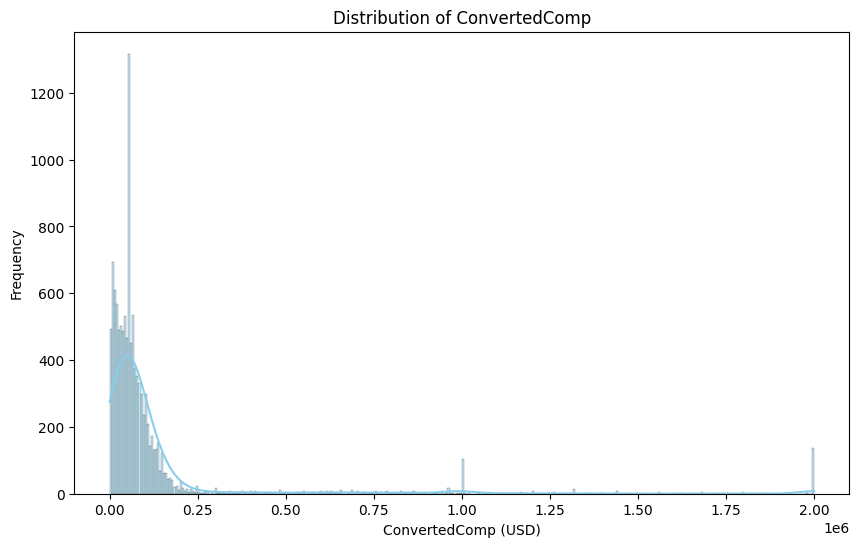

In [ ]:
#distribution curve for column ConvertedComp
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'], kde=True, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()

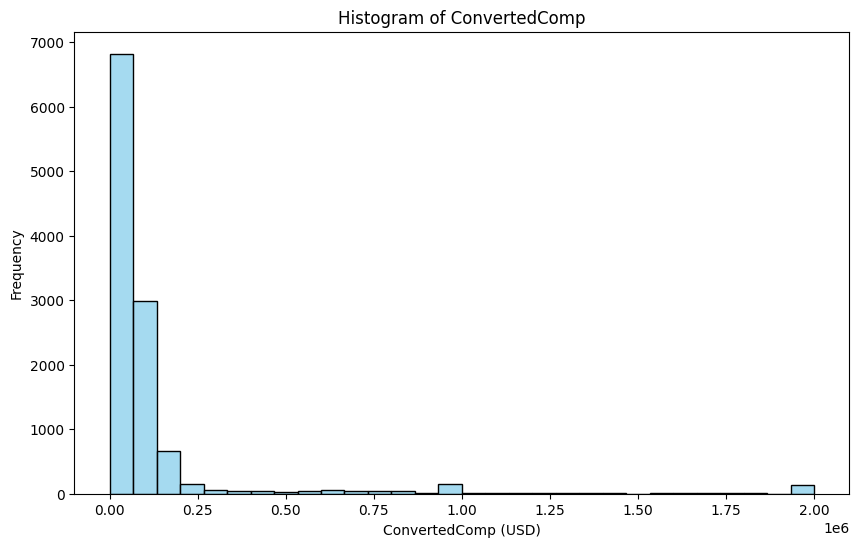

In [ ]:
#histogram for ConvertedComp
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'], bins=30, color='skyblue')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['ConvertedComp'].median()

57745.0

In [ ]:
#number of male responders
df[df['Gender'] == 'Man'].shape[0]

10480

In [ ]:
#median of ConvertedComp of female responders
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57745.0

In [ ]:
#statistic summary for column Age
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

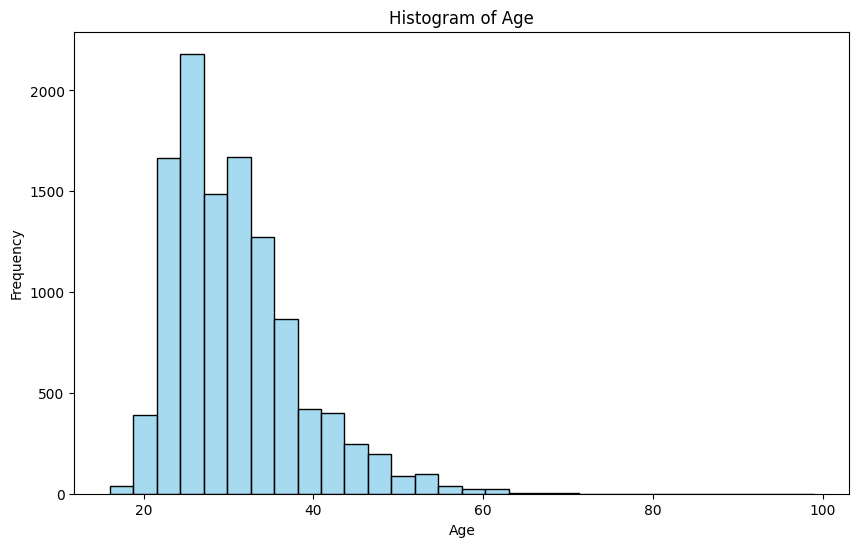

In [ ]:
#histogram for column Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

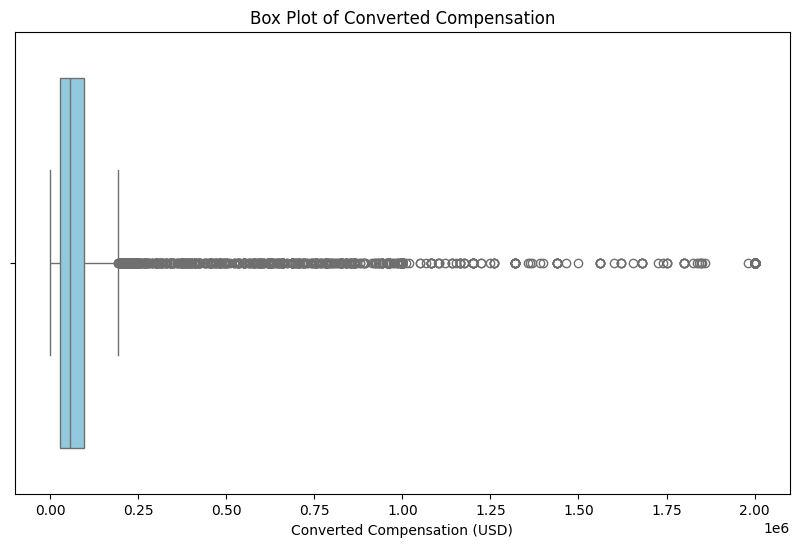

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], vert=False, color='skyblue')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

In [ ]:
#inter quartile range for the column ConvertedComp
Q1 =df['ConvertedComp'].quantile(0.25)
Q3 =df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
IQR

65984.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for outliers:", lower_bound)
print("Upper Bound for outliers:", upper_bound)

Lower Bound for outliers: -69960.0
Upper Bound for outliers: 193976.0


In [ ]:
#number of outliers
outliers = []
for num in df['ConvertedComp']:
  if num < lower_bound or num > upper_bound:
    outliers.append(num)
num_outliers = len(outliers)
num_outliers

933

In [ ]:
#dataframe with no outliers in the ConvertedComp column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [ ]:
#correlation between age and all other numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002468,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001031,0.003510,0.007063,0.006970
ConvertedComp,0.002468,0.001031,1.000000,0.020489,-0.034760,0.103232
WorkWeekHrs,-0.015314,0.003510,0.020489,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.034760,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.103232,0.036518,-0.020469,1.000000
